<a href="https://colab.research.google.com/github/quickgrid/Python-CNN-Implementation/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Each function will start with `py_` in the beginning**.


### Lessons

```
*   Use tf.keras source to structure code
*   
```



# Download and show image

In [33]:
## Download a random image from internet

!wget "https://i1.wp.com/creativecommons.org.au/content/Parliament_House_Canberra_Dusk_Panorama.jpg?fit=600%2C600" -O "img.jpg"

--2020-09-12 17:49:20--  https://i1.wp.com/creativecommons.org.au/content/Parliament_House_Canberra_Dusk_Panorama.jpg?fit=600%2C600
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80286 (78K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  78.40K  --.-KB/s    in 0.03s   

2020-09-12 17:49:20 (2.87 MB/s) - ‘img.jpg’ saved [80286/80286]



(600, 600, 3)


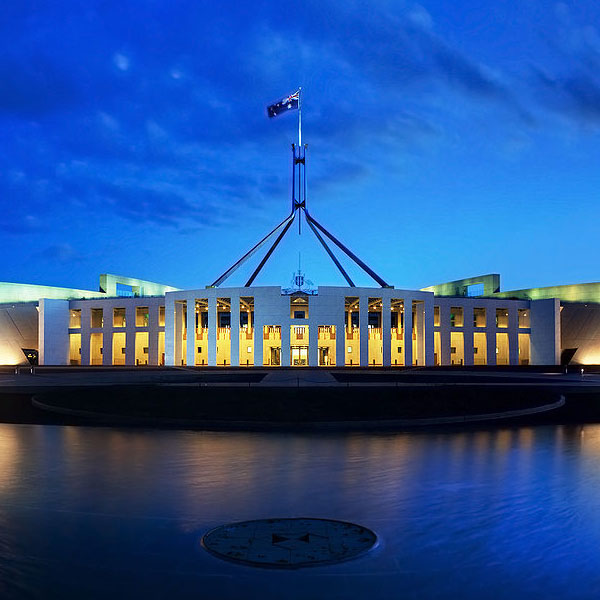

In [34]:
## read and show the image with opencv

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('img.jpg')
print(img.shape)

cv2_imshow(img)

# Function based convolution

In [35]:
## imports


import numpy as np
import random

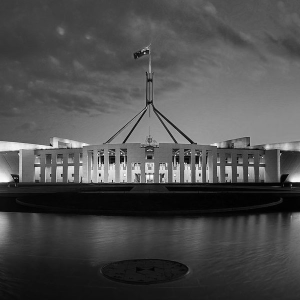

In [36]:
## scale and show gray image

im_scale_width = 300
im_scale_height = 300

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, (im_scale_width, im_scale_height))

cv2_imshow(gray_img)

In [37]:
"""
Reference, 
https://github.com/keras-team/keras/blob/998efc04eefa0c14057c1fa87cab71df5b24bf7e/keras/initializations.py
https://stackoverflow.com/questions/42670274/how-to-calculate-fan-in-and-fan-out-in-xavier-initialization-for-neural-networks
http://deeplearning.net/tutorial/lenet.html
https://stats.stackexchange.com/questions/365307/connection-between-filters-and-feature-map-in-cnn

receptive_field_size = kernel_height * kernel_width
fan_in = num_input_feature_maps * receptive_field_size
fan_out = num_output_feature_maps * receptive_field_size

he_normal((num_channels * kernel_size * kernel_size, num_filters * img_width * img_height))
"""


def he_normal(shape):
    fan_in, fan_out = shape
    s = np.sqrt(2. / fan_in)
    return np.random.normal(loc=0.0, scale=s, size=shape)


In [38]:
## Strided 2D convolution without padding
## Poor inefficient repeating calculation for convolution operation


def py_conv2d(input_img, kernel_size, stride_amount=2, kernel_initializer='he_normal', padding='same'):


  """
  `he_normal` calls function with given input shape.
  """
  if kernel_initializer == 'he_normal':
    kernel = he_normal((kernel_size, kernel_size))
  else:
    raise ValueError('Unknown argument `%s`. Only `he_normal` is implemented' % (kernel_initializer))


  """
  `valid` is no padding.
  `same` pads all around the input image such that the output of convolution operation is same shape as input image.
  """
  if padding == 'same':
    pad_amount = kernel_size >> 1
    input_img = cv2.copyMakeBorder( input_img, pad_amount, pad_amount, pad_amount, pad_amount, cv2.BORDER_CONSTANT)
  elif padding == 'valid':
    pass
  else:
    raise ValueError('Unknown argument `%s`. Padding only supports `same` and `valid`.' % (padding))


  w, h = input_img.shape


  w_out = (w - kernel_size + 1) 
  h_out = (h - kernel_size + 1) 


  output_image = np.zeros((w_out // stride_amount, h_out // stride_amount))


  c1 = 0
  for i in range(0, w_out, stride_amount):
    c2 = 0
    for j in range(0, h_out, stride_amount):

      tmp_sum = 0
      for m in range(0, kernel_size):
        for n in range(0, kernel_size):
          tmp_sum += input_img[i+m][j+n] * kernel[m][n]      
      
      output_image[c1][c2] = tmp_sum
      c2 += 1
    c1 += 1


  return output_image


In [39]:
## Implement naive max pooling


def py_maxpool(input_img):

  w, h = input_img.shape

  w_out = w >> 1
  h_out = h >> 1

  output_image = np.zeros((w_out, h_out))

  c1 = 0
  for i in range(0, w - 1, 2):
    c2 = 0
    for j in range(0, h - 1, 2):      
      
      output_image[c1][c2] = np.max([input_img[i][j], input_img[i][j+1], input_img[i+1][j], input_img[i+1][j+1]])

      c2 += 1
    c1 += 1
  return output_image

In [40]:
## activation function 


def py_leaky_relu(x):
  if x > 0:
    return x
  return 0.01 * x

In [41]:
## activation function


def py_activation(input_img, activation_name='py_leaky_relu'):

  w, h = input_img.shape

  if activation_name == 'py_leaky_relu':
    for i in range(0, w):
      for j in range(0, h):
        input_img[i][j] = py_leaky_relu(input_img[i][j])
  
  return input_img

In [42]:
## Function to display image shape and image

def py_show_image_with_shape(X):
  print(X.shape)
  cv2_imshow(X * 255)

In [43]:
## Preprocess input image before passing
## TODO: per channel normalize, scale between -1 to 1, switch BGR to RGB

def py_preprocess_input(X):
  return X / 255.0

(300, 300)
(300, 300)


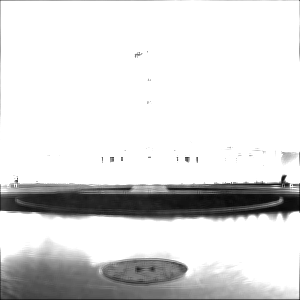

(150, 150)


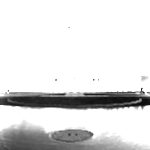

(150, 150)


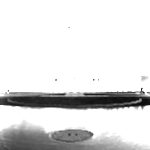

(150, 150)


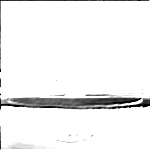

(75, 75)


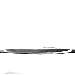

(75, 75)


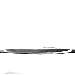

(75, 75)


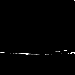

(37, 37)


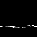

(37, 37)


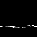

(37, 37)


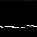

(18, 18)


(18, 18)


In [50]:
input_img = py_preprocess_input(gray_img)
print(input_img.shape)


kernel_size = 3
stride_amount = 1


#########################


X = py_conv2d(input_img, kernel_size, stride_amount, padding='same')
py_show_image_with_shape(X)


X = py_maxpool(X)
py_show_image_with_shape(X)


X = py_activation(X, activation_name='py_leaky_relu')
py_show_image_with_shape(X)


###############################


X = py_conv2d(X, kernel_size, stride_amount)
py_show_image_with_shape(X)


X = py_maxpool(X)
py_show_image_with_shape(X)


X = py_activation(X, activation_name='py_leaky_relu')
py_show_image_with_shape(X)

##################################


X = py_conv2d(X, kernel_size, stride_amount)
py_show_image_with_shape(X)


X = py_maxpool(X)
py_show_image_with_shape(X)


X = py_activation(X, activation_name='py_leaky_relu')
py_show_image_with_shape(X)

#####################################



X = py_conv2d(X, kernel_size, stride_amount)
py_show_image_with_shape(X)


X = py_maxpool(X)
py_show_image_with_shape(X)


X = py_activation(X, activation_name='py_leaky_relu')
py_show_image_with_shape(X)

########################################

# Test: multi channel input image filtering with given filter count

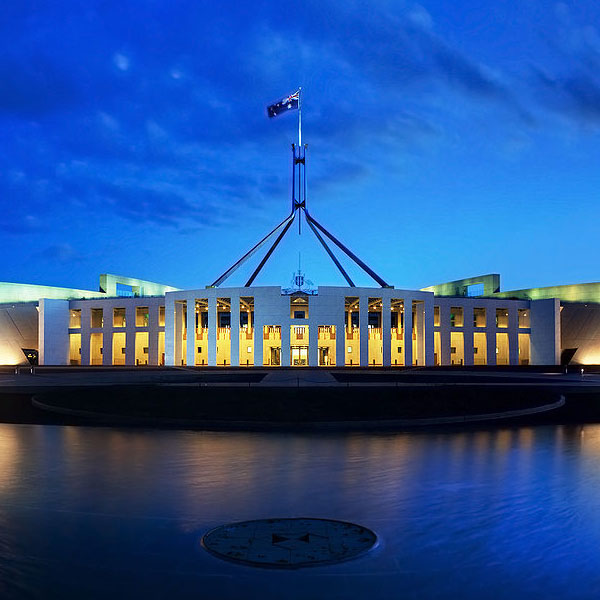

In [45]:
cv2_imshow(img)

In [46]:
"""
Page 63, algebric and visual viewpoint, http://cs231n.stanford.edu/slides/2020/lecture_2.pdf
Implement convolution as matrix multiplication
"""

## Strided 2D convolution without padding
## Poor inefficient repeating calculation for convolution operation

def py_conv2d_base(input_img, kernel_size, stride_amount=2, kernel_initializer='he_normal', padding='same'):
    
    """
    future expectation is (batch_size, width, height, channel),
    where for 1 image input is of shape (1, w, h, c) but currently
    is (w, h, c).

    1. get channel count
    2. for each channel initialize a new kernel with given kernel size
    3. do step 2 for number of filters given
    4. create and initialize bias of (kernel_size * kernel_size * num_filters)
    """

    num_channels = input_img[2]
    kernel_channel_arr = []

    for i in range(0, num_channels):
      kernel_channel_arr.append(he_normal((kernel_size, kernel_size)))


    X = py_conv2d_multi(input_img, kernel_size, stride_amount=2, kernel_initializer='he_normal', padding='same')



def py_conv2d_multi(input_img, kernel_size, stride_amount=2, kernel_initializer='he_normal', padding='same'):

  """
  `he_normal` calls function with given input shape.
  """
  if kernel_initializer == 'he_normal':
    kernel = he_normal((3, 3))
  else:
    raise ValueError('Unknown argument `%s`. Only `he_normal` is implemented' % (kernel_initializer))


  """
  `valid` is no padding.
  `same` pads all around the input image such that the output of convolution operation is same shape as input image.
  """
  if padding == 'same':
    pad_amount = kernel_size >> 1
    input_img = cv2.copyMakeBorder( input_img, pad_amount, pad_amount, pad_amount, pad_amount, cv2.BORDER_CONSTANT)
  elif padding == 'valid':
    pass
  else:
    raise ValueError('Unknown argument `%s`. Padding only supports `same` and `valid`.' % (padding))


  w, h = input_img.shape


  w_out = (w - kernel_size + 1) 
  h_out = (h - kernel_size + 1) 


  output_image = np.zeros((w_out // stride_amount, h_out // stride_amount))


  c1 = 0
  for i in range(0, w_out, stride_amount):
    c2 = 0
    for j in range(0, h_out, stride_amount):

      tmp_sum = 0
      for m in range(0, 3):
        for n in range(0, 3):
          tmp_sum += input_img[i+m][j+n] * kernel[m][n]      
      
      output_image[c1][c2] = tmp_sum
      c2 += 1
    c1 += 1


  return output_image


In [47]:
feature_map = np.random.randint(low=0, high=255, size=(28, 28, 64))

for i in range(feature_map.shape[2]):
  print(feature_map[:, :, i].shape)  # a view of original array. shape=(32, 32)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
